Elevation Gain: 444.72100830078125
Total Distance: 36.521623573378896


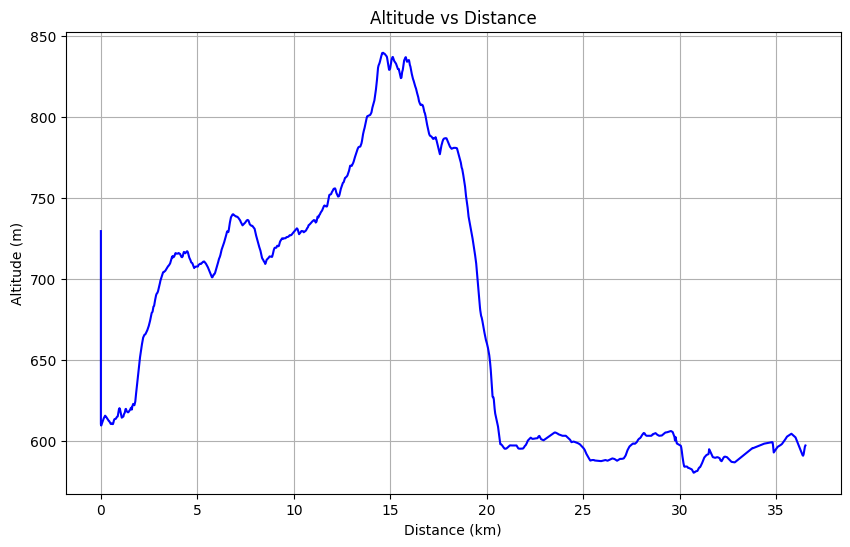

In [14]:
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt
import numpy as np

gpx_file = "Otway UNBC PG.gpx"

def calculate_elevation_gain_and_distance(gpx_file):
    gpx = gpxpy.parse(open(gpx_file, "r"))

    elevation_gain = 0
    total_distance = 0
    altitude_data = []
    distance_data = []

    for track in gpx.tracks:
        for segment in track.segments:
            previous_point = None
            for point in segment.points:
                if previous_point is not None:
                    total_distance += point.distance_2d(previous_point)/1000
                    if point.elevation > previous_point.elevation:
                        elevation_gain += point.elevation - previous_point.elevation
                altitude_data.append(point.elevation)
                distance_data.append(total_distance)
                previous_point = point

    return elevation_gain, total_distance, altitude_data, distance_data


#usage 
elevation_gain, total_distance, altitude_data, distance_data = calculate_elevation_gain_and_distance(gpx_file)
print("Elevation Gain:", elevation_gain)
print("Total Distance:", total_distance)

# Plotting altitude vs distance
plt.figure(figsize=(10, 6))
plt.plot(distance_data, altitude_data, color='blue')
plt.title('Altitude vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Altitude (m)')
plt.grid(True)
plt.show()


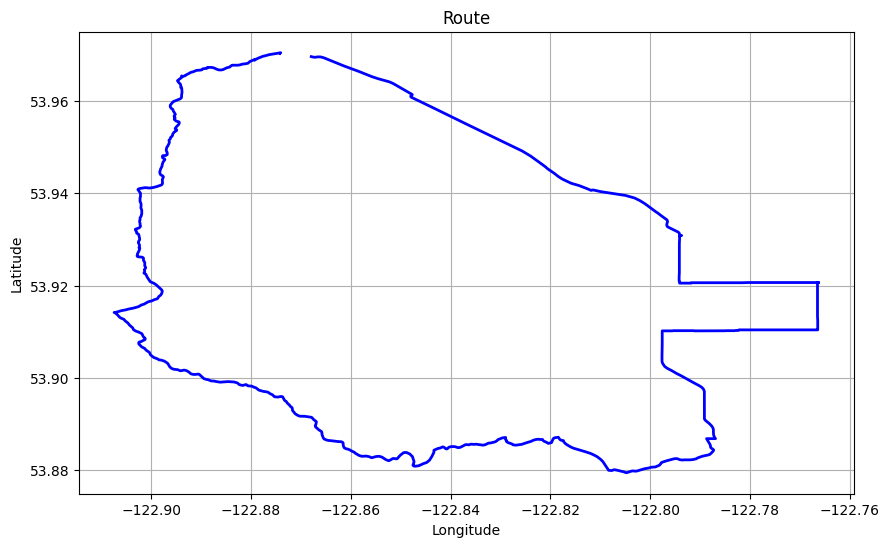

In [15]:
import gpxpy
import gpxpy.gpx
import matplotlib.pyplot as plt


def plot_route(gpx_file):
    gpx = gpxpy.parse(open(gpx_file, "r"))

    route_lats = []
    route_lons = []

    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                route_lats.append(point.latitude)
                route_lons.append(point.longitude)

    # Plotting the route
    plt.figure(figsize=(10, 6))
    plt.plot(route_lons, route_lats, color='blue', linewidth=2)
    plt.title('Route')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()



plot_route(gpx_file)
